## Import potrzebnych plików

In [265]:
!pip install -q gdown
import gdown
import pandas as pd
from IPython.display import Image, display

In [266]:
logo_file_id = '1K4lHH2V4arM72nW8mHLqVglH7JWSIvfs'
students_file_id = '1-RZwemdnD6QSDwTXkHPeeDoMwedIdMaC'
food_file_id = '1syGPE8uurDb-Ru3EcHesiwJs2iEr0qYU'
mall_file_id = '18uftPqGgLxu3uqIXbgpgW2pcSdfdaB8S'

Downloading...
From: https://drive.google.com/uc?id=1K4lHH2V4arM72nW8mHLqVglH7JWSIvfs
To: /content/ps-logo.png
100%|██████████| 33.5k/33.5k [00:00<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-RZwemdnD6QSDwTXkHPeeDoMwedIdMaC
To: /content/students_habits.csv
100%|██████████| 73.7k/73.7k [00:00<00:00, 29.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1syGPE8uurDb-Ru3EcHesiwJs2iEr0qYU
To: /content/food_habits.csv
100%|██████████| 97.2k/97.2k [00:00<00:00, 8.20MB/s]
Downloading...
From: https://drive.google.com/uc?id=18uftPqGgLxu3uqIXbgpgW2pcSdfdaB8S
To: /content/Mall_Customers.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 9.80MB/s]


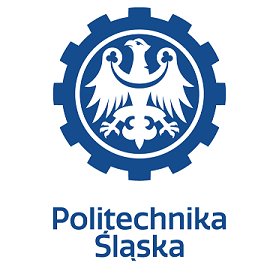

In [267]:
# Pobranie plików
gdown.download(f'https://drive.google.com/uc?id={logo_file_id}', 'ps-logo.png', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={students_file_id}', 'students_habits.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={food_file_id}', 'food_habits.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={mall_file_id}', 'Mall_Customers.csv', quiet=False)


# Wyświetlenie obrazka
display(Image('ps-logo.png', width=300))

## WSTĘP


### Wprowadzenie
>**Eksploracja danych** (ang. *Data Mining*) stanowi jeden z kluczowych obszarów współczesnej analizy danych, którego celem jest odkrywanie ukrytych wzorców, zależności oraz struktur w dużych i złożonych zbiorach danych. W przeciwieństwie do klasycznej analizy statystycznej, metody eksploracji danych koncentrują się nie tylko na wnioskowaniu statystycznym, lecz również na automatycznym wydobywaniu wiedzy z danych przy użyciu algorytmów uczenia maszynowego i technik sztucznej inteligencji.

>W niniejszym projekcie zastosowano wybrane algorytmy eksploracji danych do analizy trzech odmiennych strukturalnie zbiorów danych. Głównym przedmiotem badań jest zbiór opisujący nawyki edukacyjne i styl życia studentów (Student Habits), natomiast jako zbiory referencyjne dla technik redukcji wymiarowości oraz dla klasteryzacji wykorzystano bazę danych wartości odżywczych produktów spożywczych (Food Nutrition Dataset) oraz zbiór danych zawierający informacje o klientach centrum handlowego (Mall customers).Takie podejście pozwoliło na przetestowanie skuteczności metod eksploracji danych w różnych warunkach.

>Projekt realizowany jest w ramach przedmiotu **Algorytmy Eksploracji Danych** i ma na celu praktyczne wykorzystanie poznanych metod na rzeczywistych danych.

### Cel projektu
>Głównym celem projektu jest identyfikacja zależności pomiędzy nawykami edukacyjnymi a wynikami egzaminów studentów, a także ocena przydatności różnych technik redukcji danych w zależności od charakterystyki zbioru.

W ramach projektu dąży się do:
* **redukcji wymiarowości danych** w celu uproszczenia ich struktury i identyfikacji najistotniejszych cech,
* **wyodrębnienia jednorodnych grup** studentów o podobnych charakterystykach przy użyciu metod klasteryzacji,
* **odkrycia istotnych reguł asocjacyjnych** opisujących współwystępowanie określonych zachowań i cech studentów.

>Uzyskane wyniki pozwolą lepiej zrozumieć strukturę danych oraz relacje pomiędzy poszczególnymi zmiennymi, a także ocenić przydatność zastosowanych metod eksploracji danych dla analizowanych zbiorów.

### Charakterystyka zbioru danych "students habits"

>Dane wykorzystane w niniejszym sprawozdaniu pochodzą z zbioru dostępnego na platformie Kaggle, dotyczącego nawyków edukacyjnych, stylu życia oraz wyników egzaminacyjnych studentów. Zbiór obejmuje 1000 obserwacji, z których każda odpowiada jednemu studentowi.

>Dane zawierają zarówno zmienne ilościowe, jak i jakościowe, opisujące m.in. czas poświęcany na naukę, aktywność fizyczną, sen, korzystanie z mediów społecznościowych oraz osiągane wyniki egzaminów.

W analizie uwzględniono następujące zmienne:
* wiek i płeć studenta,
* liczba godzin nauki dziennie,
* czas spędzany w mediach społecznościowych,
* frekwencja na zajęciach (w procentach),
* liczba godzin snu,
* jakość diety i częstotliwość aktywności fizycznej,
* poziom wykształcenia rodziców,
* subiektywna ocena zdrowia psychicznego,
* uczestnictwo w zajęciach dodatkowych,
* wynik egzaminu końcowego.

>W ramach wstępnego przetwarzania danych usunięto wiersze zawierające braki danych oraz pojedyncze obserwacje dla kategorii płci „Other” (ze względu na zbyt małą liczebność). Ostatecznie do badania zakwalifikowano **873 studentów**.

>Przed zastosowaniem wybranych metod dane zostały wstępnie przetworzone, w tym zakodowane zmienne jakościowe oraz ustandaryzowane zmienne ilościowe, co jest niezbędne m.in. w przypadku algorytmów opartych na miarach odległości.

### Charakterystyka zbioru danych "Food Nutrition"
>Do analizy uzupełniającej techniki redukcji wymiarów wybrano zbiór danych **"Food Nutrition Dataset"** (źródło: platforma Kaggle). Zbiór ten zawiera szczegółowe profile odżywcze różnorodnych produktów spożywczych. Znajduje się w nim 551 unikalnych rekordów.

**Struktura danych:** <br>
Każda obserwacja (produkt) opisana jest szeregiem zmiennych ilościowych, które można podzielić na grupy funkcjonalne:

* **Wartość energetyczna:** Kaloryczność (*Energy_kcal*).
* **Makroskładniki:** Białko (*Protein*), Tłuszcze ogółem (*Total_Fat*) wraz z podziałem na rodzaje (nasycone, jednonienasycone), Węglowodany (*Carbohydrate*), Cukry, Błonnik.
* **Mikroskładniki:** Witaminy i minerały (np. Sód, Potas, Cholesterol).

### Charakterystyka zbioru danych: Mall Customers

>Do analizy klasteryzacji zaimportowano zbiór Mall Customers, ponieważ pozostałe zbiory nie zapewniały satysfakcjonującej nas jakości separacji grup.
Wstępne próby klasteryzacji na zbiorze dotyczącym studentów dały wynik współczynnika Silhouette na poziomie 0.1, co wskazuje na niemal całkowite nakładanie się na siebie klastrów i brak wyraźnych granic między nimi.

>Zbiór danych zawiera informacje o klientach centrum handlowego. Pozwala na identyfikację grup klientów o podobnych cechach i zachowaniach zakupowych.

**Struktura zbioru:**
* **Liczba rekordów:** 200
* **Liczba zmiennych:** 5

**Opis zmiennych:**
1. **CustomerID:** Unikalny identyfikator klienta (zmienna techniczna).
2. **Genre:** Płeć klienta (Male/Female).
3. **Age:** Wiek klienta.
4. **Annual Income (k$):** Roczny dochód klienta wyrażony w tysiącach dolarów.
5. **Spending Score (1-100):** Wskaźnik wydatków przypisany przez centrum handlowe na podstawie zachowań klienta i historii zakupów (skala 1-100).

## Przygotowanie zbioru danych

### Import potrzebnych bibliotek

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Czyszczenie oraz standaryzacja danych

In [269]:
# Wczytanie i oczyszczenie danych
df = pd.read_csv('students_habits.csv')
df_clean = df.dropna()
df_clean = df_clean[df_clean['gender'] != 'Other']

# Wizualizacja danych
print(df_clean['gender'].value_counts())
print(f"Załadowano dane. Liczba obserwacji po czyszczeniu: {len(df_clean)}")
print(f"Sprawdzenie, czy zbiór nie posiada już brakujących wartości: \n{df_clean.isna().sum()}")

gender
Male      440
Female    433
Name: count, dtype: int64
Załadowano dane. Liczba obserwacji po czyszczeniu: 873
Sprawdzenie, czy zbiór nie posiada już brakujących wartości: 
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [270]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [271]:
print(f"Rozmiar danych po oczyszczeniu: {df_clean.shape}")
print(f"Informacje o zbiorze danychL {df_clean.info()}")
print(f"Podstawowe parametry statystyczne: {df_clean.describe()}")

Rozmiar danych po oczyszczeniu: (873, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     873 non-null    object 
 1   age                            873 non-null    int64  
 2   gender                         873 non-null    object 
 3   study_hours_per_day            873 non-null    float64
 4   social_media_hours             873 non-null    float64
 5   netflix_hours                  873 non-null    float64
 6   part_time_job                  873 non-null    object 
 7   attendance_percentage          873 non-null    float64
 8   sleep_hours                    873 non-null    float64
 9   diet_quality                   873 non-null    object 
 10  exercise_frequency             873 non-null    int64  
 11  parental_education_level       873 non-null    object 
 12  internet_qual

## 3. Techniki redukcji wymiarów

### Charakterystyka metody
>Do próby redukcji wymiarowości zbioru danych wybrano Analizę Głównych Składowych (PCA – Principal Component Analysis). Jest to najpopularniejsza technika nienadzorowana (unsupervised learning), służąca do transformacji zestawu skorelowanych zmiennych w mniejszy zestaw nieskorelowanych zmiennych, zwanych głównymi składowymi.

#### Uzasadnienie wyboru
>Teoretycznym uzasadnieniem użycia PCA była weryfikacja hipotezy, że analizowane zmienne behawioralne (np. *czas nauki, sen, frekwencja*) są ze sobą liniowo powiązane i tworzą ukryte wzorce (np. czynnik „zaangażowania”). Pozwoliłoby to na zastąpienie 8 zmiennych wejściowych 2-3 składowymi bez istotnej utraty informacji.

#### Podstawy matematyczne (Dekompozycja SVD)
>W implementacji numerycznej PCA nie jest obliczane bezpośrednio z macierzy kowariancji, lecz wykorzystuje **Rozkład według wartości osobliwych (SVD – Singular Value Decomposition)**.

Proces ten polega na faktoryzacji zestandaryzowanej macierzy danych $X$ na iloczyn trzech macierzy:

$$
X = U \cdot \Sigma \cdot V^T
$$

Każda z tych macierzy pełni ściśle określoną rolę w procesie transformacji danych:

* **Macierz $V^T$ (Definicja nowych osi):** <br>
  Macierz wektorów własnych (kierunków), która definiuje jaki wkład (wagę) mają poszczególne zmienne pierwotne w tworzeniu nowego wymiaru.

* **Macierz $\Sigma$ (Hierarchia ważności):** <br>
  Macierz diagonalna zawierająca wartości osobliwe, które reprezentują **siłę zmienności** (wariancję) niesioną przez każdą składową.
  Wartości te tworzą ranking – od składowej najważniejszej (największa wartość) do szumu informacyjnego (wartości bliskie zeru). To na podstawie macierzy $\Sigma$ tworzony jest wykres osypiska i podejmowana decyzja o odcięciu (np. wg kryterium Kaisera).

* **Macierz $U$ (Nowe współrzędne):**
  Reprezentuje zrzutowane punkty (obserwacje) w nowej przestrzeni (gdzie leżą na osi).

Dzięki SVD algorytm automatycznie sortuje składowe od tej o największej wariancji do najmniej istotnej (będącej szumem), co umożliwia precyzyjne odcięcie nadmiarowych komponentów.

### Implementacja

In [272]:
# 1. Wczytanie i przygotowanie
numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage',
            'sleep_hours', 'exercise_frequency', 'mental_health_rating']

feature_labels = ['Wiek', 'Nauka (h)', 'Social Media (h)', 'Netflix (h)', 'Frekwencja (%)',
                  'Sen (h)', 'Ilość ćwiczeń sportowych (0-6)', 'Stan zdrowia psychicznego (1-10)']

x = df[numeric_features].values

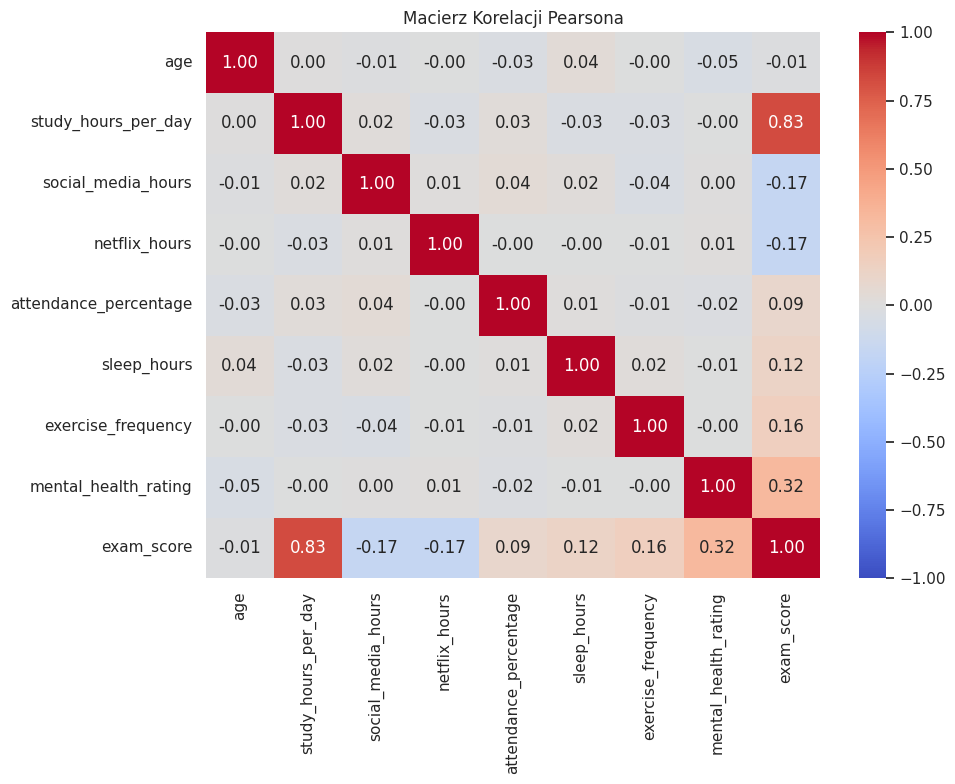

In [273]:
numeric_features.append('exam_score')

# macierz korelacji
corr_matrix = df[numeric_features].corr()

# mapa ciepła macierzy koleracji
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Macierz Korelacji Pearsona')
plt.tight_layout()
plt.show()

In [274]:
# standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [275]:
# pca
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

In [276]:
# analiza wariancji
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = len(numeric_features)

### Wyniki i wizualizacja

In [277]:
print(f"Ilość wyjaśnionej wariancji przez poszczególne komponenty: \n{explained_variance}")
print(f"Skumulowana wariancja wyjaśniona przez poszczególne komponenty: \n{cumulative_variance}")
print(f"Liczba komponentów wymagana do wyjaśnienia 80% wariancji: \n{np.argmax(cumulative_variance >= 0.8) + 1}")

Ilość wyjaśnionej wariancji przez poszczególne komponenty: 
[0.13577518 0.13270941 0.12957752 0.12662841 0.12353006 0.11942081
 0.11766497 0.11469363]
Skumulowana wariancja wyjaśniona przez poszczególne komponenty: 
[0.13577518 0.26848459 0.39806211 0.52469053 0.64822059 0.7676414
 0.88530637 1.        ]
Liczba komponentów wymagana do wyjaśnienia 80% wariancji: 
7


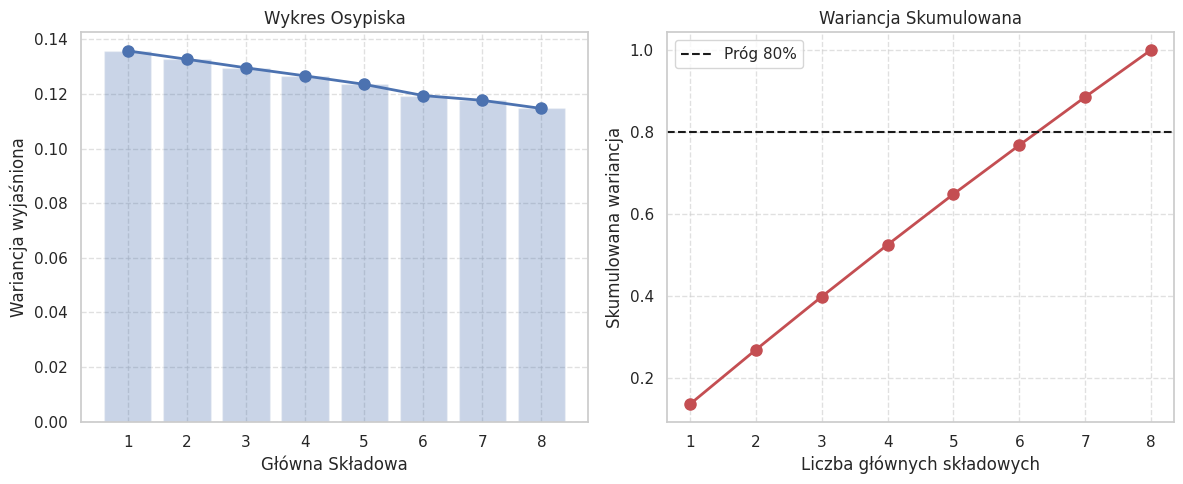

In [278]:
plt.figure(figsize=(12, 5))

# Wykres osypiska
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2, markersize=8)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.3, align='center')
plt.xlabel('Główna Składowa')
plt.ylabel('Wariancja wyjaśniona')
plt.title('Wykres Osypiska')
plt.grid(True, linestyle='--', alpha=0.6)

# Wykres skumulowanej wariancji
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Liczba głównych składowych')
plt.ylabel('Skumulowana wariancja')
plt.title('Wariancja Skumulowana')
plt.axhline(y=0.8, color='k', linestyle='--', label='Próg 80%')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Wnioski z analizy
Przeprowadzona analiza PCA, a w szczególności wykres osypiska, doprowadziła do wniosku, że **zastosowanie redukcji wymiarów tą metodą nie jest efektywne dla tego konkretnego zbioru danych.**

**Uzasadnienie:**

>Brak wyraźnego "łokcia": Wykres osypiska jest stosunkowo płaski. Pierwsza składowa (PC1) wyjaśnia jedynie ok. 19% wariancji, a kolejne spadają bardzo powoli (18%, 16% itd.). Aby wyjaśnić wymagane 80% zmienności danych, musielibyśmy zachować aż 6 z 8 składowych.


**Wniosek o strukturze danych:**
>Wynik ten dostarcza istotnej informacji o naturze badanej populacji – zmienne opisujące nawyki studentów są od siebie niezależne liniowo (słabo skorelowane). Oznacza to, że np. ilość snu nie determinuje czasu spędzanego w social mediach ani frekwencji. Każda zmienna wnosi unikalną, "nową" informację, której nie da się skompresować.

**Decyzja:**
>Z racji powyższych wyników zrezygnowano z transformacji danych do przestrzeni PCA na rzecz pracy na zmiennych oryginalnych.

### Dodatkowa analiza zbioru danych "Food Nutrition"

#### Uzasadnienie rozszerzenia zakresu analizy
>Przeprowadzona w głównej części projektu analiza zbioru Student Habits wykazała, że zmienne opisujące nawyki studentów charakteryzują się wysoką niezależnością i brakiem silnych korelacji liniowych. W rezultacie metody redukcji wymiarowości oparte na wariancji (takie jak PCA) nie przyniosły spodziewanych efektów w postaci wyraźnego zmniejszenia liczby wymiarów przy zachowaniu informacji.

>W celu pełnej demonstracji potencjału algorytmu PCA oraz poprawności przyjętej metodologii, zdecydowano się na przeprowadzenie analizy porównawczej na dodatkowym, referencyjnym zbiorze danych. Wybrano zbiór, w którym teoretycznie spodziewamy się występowania silnych zależności między zmiennymi, co stanowi idealne środowisko dla technik redukcji wymiarów.

### Implementacja

In [279]:
df_food = pd.read_csv('food_habits.csv')
df_food.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [280]:
print(f"Rozmiar danych po oczyszczeniu: {df_food.shape}")
print(f"Informacje o zbiorze danychL {df_food.info()}")
print(f"Podstawowe parametry statystyczne: {df_food.describe()}")
print(f"Sprawdzenie, czy zbiór nie posiada brakujących wartości: \n{df_food.isna().sum()}")

Rozmiar danych po oczyszczeniu: (551, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          551 non-null    int64  
 1   Unnamed: 0            551 non-null    int64  
 2   food                  551 non-null    object 
 3   Caloric Value         551 non-null    int64  
 4   Fat                   551 non-null    float64
 5   Saturated Fats        551 non-null    float64
 6   Monounsaturated Fats  551 non-null    float64
 7   Polyunsaturated Fats  551 non-null    float64
 8   Carbohydrates         551 non-null    float64
 9   Sugars                551 non-null    float64
 10  Protein               551 non-null    float64
 11  Dietary Fiber         551 non-null    float64
 12  Cholesterol           551 non-null    float64
 13  Sodium                551 non-null    float64
 14  Water                 551 non-nu

In [281]:
# usunięcie kolumny "unnamed"
df_food_num = df_food.select_dtypes(include=[np.number])
df_food_clean = df_food_num.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df_food_clean.head()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [282]:
# standaryzacja zmiennych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_food_clean)
X_scaled

array([[-0.93622169, -0.4601469 , -0.15257726, ..., -0.10405264,
        -0.2477792 , -0.73627364],
       [-0.11232764,  0.68883741,  1.33106891, ..., -0.22862113,
        -0.14630105, -0.07792903],
       [-0.94626918, -0.57185371, -0.26385072, ..., -0.22897431,
        -0.25376657, -0.74520996],
       ...,
       [-1.02664908, -0.83516262, -0.68131166, ..., -0.22856226,
        -0.23841435, -0.65788553],
       [-0.45394224, -0.75537204, -0.63476226, ..., -0.2287781 ,
        -0.14630105, -0.46161289],
       [ 0.68142395,  0.12232431, -0.17112283, ..., -0.22880426,
        -0.06953997, -0.01646106]])

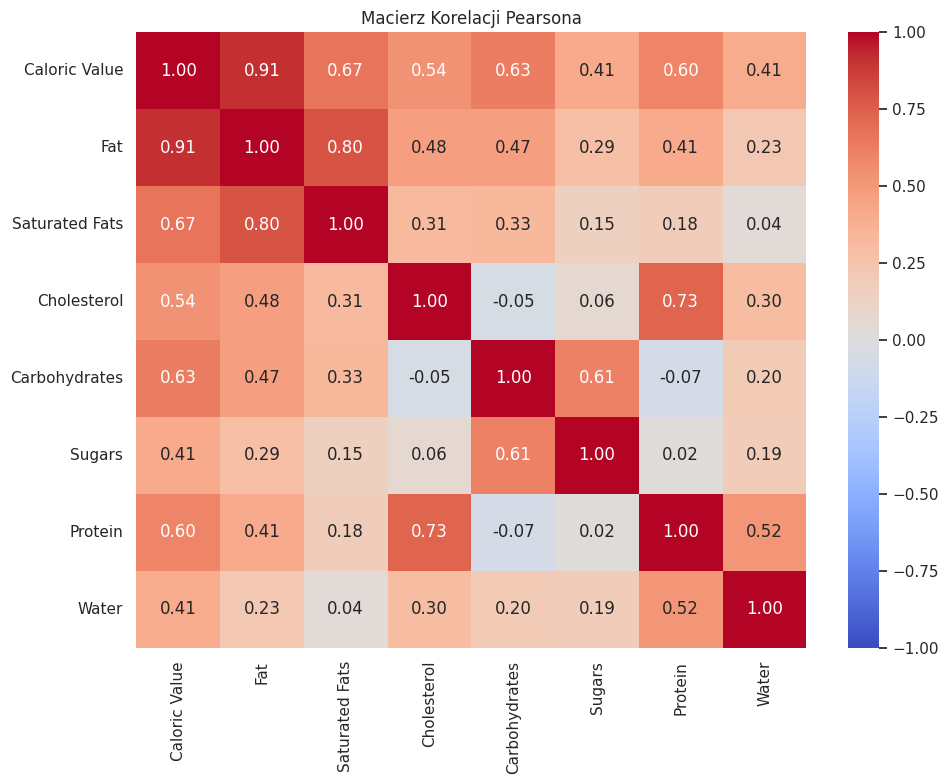

In [283]:
# macierz koleracji
selected_columns = [
    'Caloric Value',
    'Fat',
    'Saturated Fats',
    'Cholesterol',
    'Carbohydrates',
    'Sugars',
    'Protein',
    'Water'
]

cols_to_plot = [col for col in selected_columns if col in df_food_clean.columns]
corr_subset_matrix = df_food_clean[cols_to_plot].corr()

# mapa ciepła
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Macierz Korelacji Pearsona')
plt.tight_layout()
plt.show()

In [284]:
# pca
pca_v2 = PCA()
pca_components = pca_v2.fit_transform(X_scaled)

In [285]:
# analiza wariancji
explained_variance = pca_v2.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = len(explained_variance)

# utworzenie etykiet dla składowych
pc_labels = [f'PC{i+1}' for i in range(n_components)]

### Wyniki i wizualizacja

In [286]:
print(f"Ilość wyjaśnionej wariancji przez poszczególne komponenty: \n{explained_variance}")
print(f"Skumulowana wariancja wyjaśniona przez poszczególne komponenty: \n{cumulative_variance}")
print(f"Liczba komponentów wymagana do wyjaśnienia 80% wariancji: \n{np.argmax(cumulative_variance >= 0.75) + 1}")

Ilość wyjaśnionej wariancji przez poszczególne komponenty: 
[2.53586271e-01 1.40392416e-01 9.99316522e-02 7.16473828e-02
 4.71253440e-02 4.17704651e-02 3.79497298e-02 3.11375452e-02
 3.03291920e-02 2.75023391e-02 2.47654586e-02 2.22208981e-02
 2.10748562e-02 1.93257442e-02 1.64730029e-02 1.37425033e-02
 1.27328502e-02 1.17936456e-02 9.87738717e-03 8.81438954e-03
 8.02820588e-03 7.85126671e-03 7.28263892e-03 6.74661165e-03
 5.92365754e-03 5.47068183e-03 4.67316995e-03 4.21642980e-03
 2.98911575e-03 2.13332752e-03 1.76003473e-03 6.97618756e-04
 3.41683920e-05 4.88208755e-10]
Skumulowana wariancja wyjaśniona przez poszczególne komponenty: 
[0.25358627 0.39397869 0.49391034 0.56555772 0.61268307 0.65445353
 0.69240326 0.72354081 0.75387    0.78137234 0.8061378  0.82835869
 0.84943355 0.86875929 0.8852323  0.8989748  0.91170765 0.9235013
 0.93337868 0.94219307 0.95022128 0.95807254 0.96535518 0.9721018
 0.97802545 0.98349613 0.9881693  0.99238573 0.99537485 0.99750818
 0.99926821 0.99996583

>Kryterium Kaisera mówi o tym, że składowe główne, które chcemy pozostawić do interpretacji powinny mieć przynajmniej taką samą wariancję jak dowolna wystandaryzowana zmienna pierwotna. W związku z tym, że wariancja każdej wystandaryzowanej zmiennej pierwotnej wynosi 1, to według kryterium Kaisera ważne są tylko składowe główne, których wartość własna przekracza lub jest bliska wartości 1.

In [287]:
# Sprawdzenie Reguły Kaisera
eigenvalues = pca_v2.explained_variance_
n_kaiser = sum(eigenvalues > 1)
print(f"Liczba składowych wg kryterium Kaisera (wartość własna > 1): {n_kaiser}")

Liczba składowych wg kryterium Kaisera (wartość własna > 1): 9


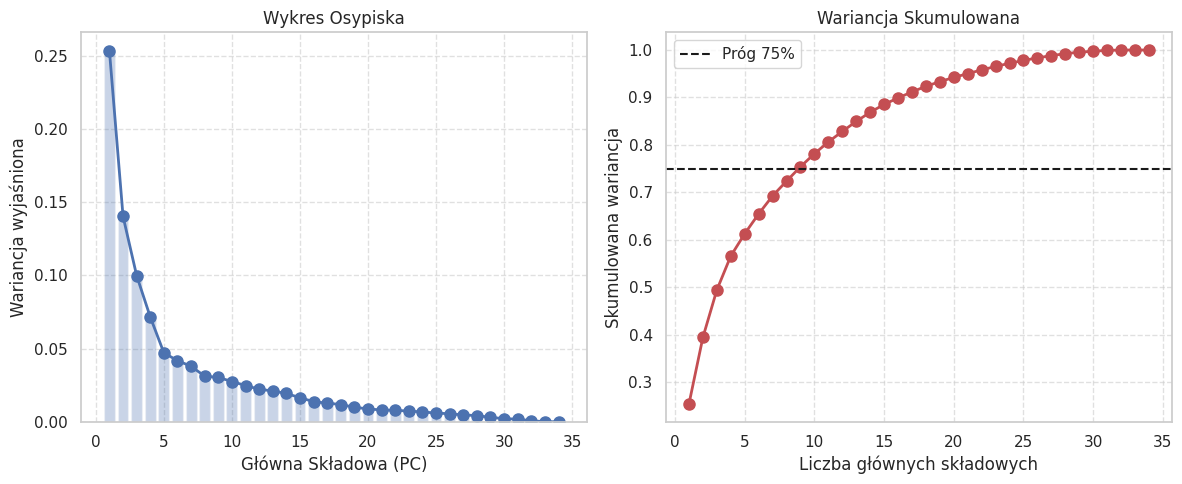

In [288]:
plt.figure(figsize=(12, 5))

# wykres osypiska
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2, markersize=8)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.3, align='center')
plt.xlabel('Główna Składowa (PC)')
plt.ylabel('Wariancja wyjaśniona')
plt.title('Wykres Osypiska')
plt.grid(True, linestyle='--', alpha=0.6)

# wykres skumulowanej wariancji
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Liczba głównych składowych')
plt.ylabel('Skumulowana wariancja')
plt.title('Wariancja Skumulowana')
plt.axhline(y=0.75, color='k', linestyle='--', label='Próg 75%')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Dobór liczby składowych (Kryterium Kaisera + wykres osypiska)

* **Wynik:** Zidentyfikowano **9 głównych składowych** (PC1–PC9) spełniających kryterium Kaisera (których wartości własne nie przekraczają 1)
* **Wariancja:** Wybrane 9 składowych wyjaśnia łącznie aż **75.39%** całkowitej zmienności danych. Oznacza to, że redukując liczbę zmiennych z ponad 30 do 9, tracimy zaledwie ~25% informacji, co jest bardzo korzystnym stosunkiem kompresji.
* **Wykres osypiska:** Analiza wizualna potwierdza ten wybór – choć pierwszy wyraźny "łokieć" pojawia się wcześniej, to dalsze składowe (do dziewiątej włącznie) nadal wnoszą istotną wartość informacyjną (powyżej poziomu szumu pojedynczej zmiennej).

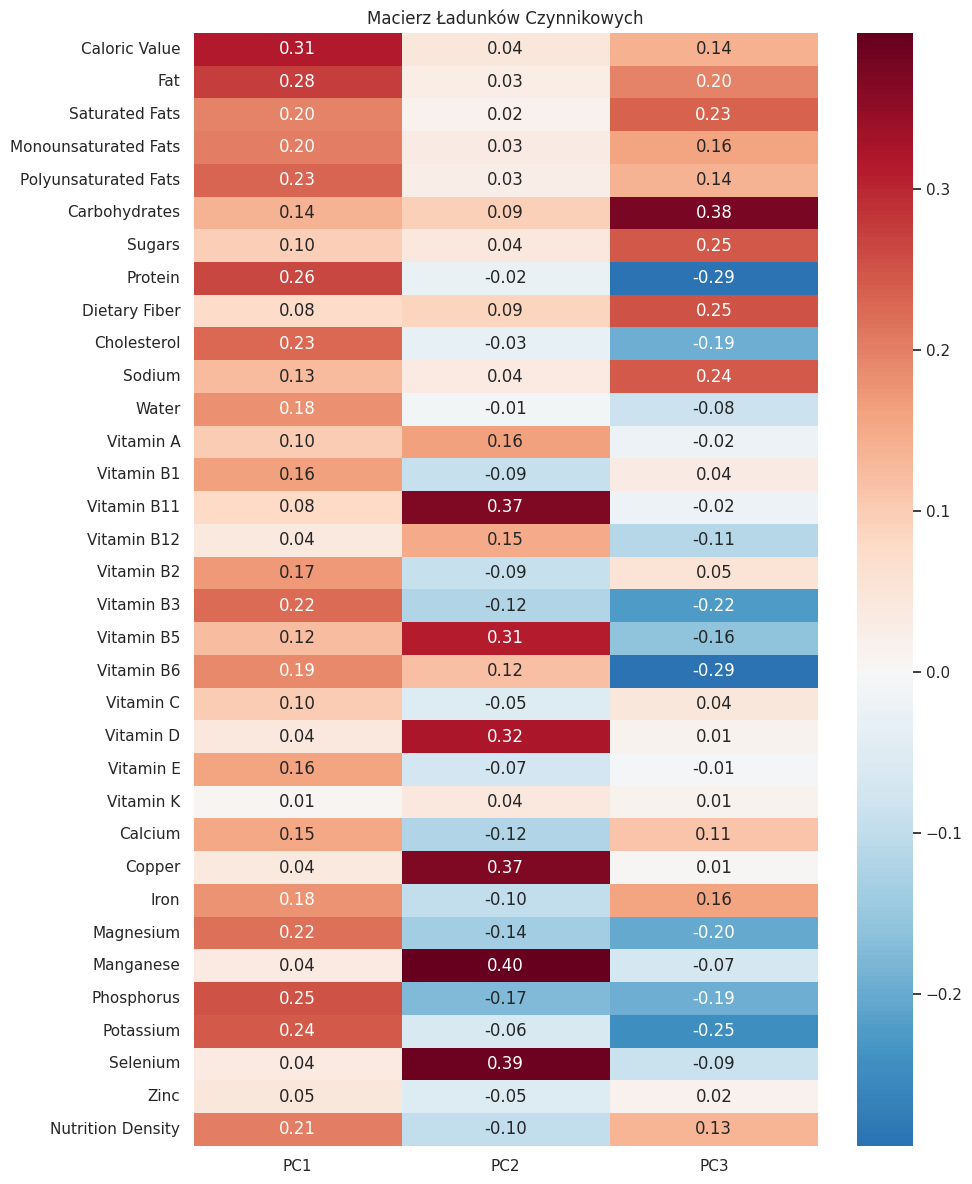

In [289]:
# wizualizacja trzech pierwszych składowych
n_display = 3
loadings = pd.DataFrame(
    pca_v2.components_.T[:, :n_display],
    columns=pc_labels[:n_display],
    index=df_food_clean.columns
)

plt.figure(figsize=(10, 12))
sns.heatmap(loadings, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Macierz Ładunków Czynnikowych')
plt.tight_layout()
plt.show()

In [290]:
n = 9
best_pca = PCA(n_components=n)
y_food_pred = best_pca.fit_transform(X_scaled)

explained_variance = best_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = len(explained_variance)

print(f"Ilość wyjaśnionej wariancji przez poszczególne komponenty: \n{explained_variance}")
print(f"Skumulowana wariancja wyjaśniona przez poszczególne komponenty: \n{cumulative_variance}")
print(f"Liczba komponentów: \n{n_components}")
print(f"Ilość wyjaśnionej wariancji przez wszystkie {n_components} komponentów (składowych głownych): \n{cumulative_variance[n_components - 1]}")

Ilość wyjaśnionej wariancji przez poszczególne komponenty: 
[0.25358627 0.14039242 0.09993165 0.07164738 0.04712534 0.04177047
 0.03794973 0.03113755 0.03032919]
Skumulowana wariancja wyjaśniona przez poszczególne komponenty: 
[0.25358627 0.39397869 0.49391034 0.56555772 0.61268307 0.65445353
 0.69240326 0.72354081 0.75387   ]
Liczba komponentów: 
9
Ilość wyjaśnionej wariancji przez wszystkie 9 komponentów (składowych głownych): 
0.7538699973345127


In [291]:
# wartości poszczególnych komponentów dla konkretnych zmiennych
pca_df = pd.DataFrame(data=y_food_pred, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
pca_df['Nazwa'] = df_food['food']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Nazwa
0,-2.970724,0.580274,-0.232497,1.077020,0.435203,-0.602866,0.966964,-0.161071,-0.309274,cream cheese
1,-0.914690,0.288309,0.482089,1.951470,-0.096238,-0.736004,0.727755,0.050529,-0.483080,neufchatel cheese
2,-3.518727,-0.405713,0.228506,0.200850,-0.455801,-0.833082,-0.364303,0.022932,-0.008921,requeijao cremoso light catupiry
3,-3.270407,0.866867,-0.376277,0.763803,0.343701,-0.275602,0.976973,-0.184909,-0.102361,ricotta cheese
4,-3.289398,-0.048034,-0.136004,0.495923,0.021225,-0.454472,0.297267,-0.090881,0.158635,cream cheese low fat


>W celu oceny, w jakim stopniu poszczególne zmienne są reprezentowane przez wybrany model 9 składowych, obliczono wskaźnik jakości odwzorowania (ang. Quality of Representation lub Squared Cosine). Wskaźnik ten, obliczany jako suma kwadratów ładunków czynnikowych, informuje o tym, jaka część wariancji danej zmiennej została zachowana w zredukowanej przestrzeni.

Średnia jakość odwzorowania zmienności: 0.7552
Ilość wyjaśnionej wariancji przez wszystkie 9 komponentów (składowych głownych): 0.7539
=== TOP 10 ZMIENNYCH NAJLEPIEJ ODWZOROWANYCH ===
                   Jakość Odwzorowania wariancji
Caloric Value                           0.966760
Nutrition Density                       0.941726
Fat                                     0.938145
Manganese                               0.936929
Calcium                                 0.929281
Selenium                                0.913553
Protein                                 0.901284
Phosphorus                              0.894277
Vitamin K                               0.878160
Carbohydrates                           0.845121

=== ZMIENNE SŁABO ODWZOROWANE (< 0.5) ===
           Jakość Odwzorowania wariancji
Sugars                          0.482311
Vitamin A                       0.460863
Vitamin C                       0.400457


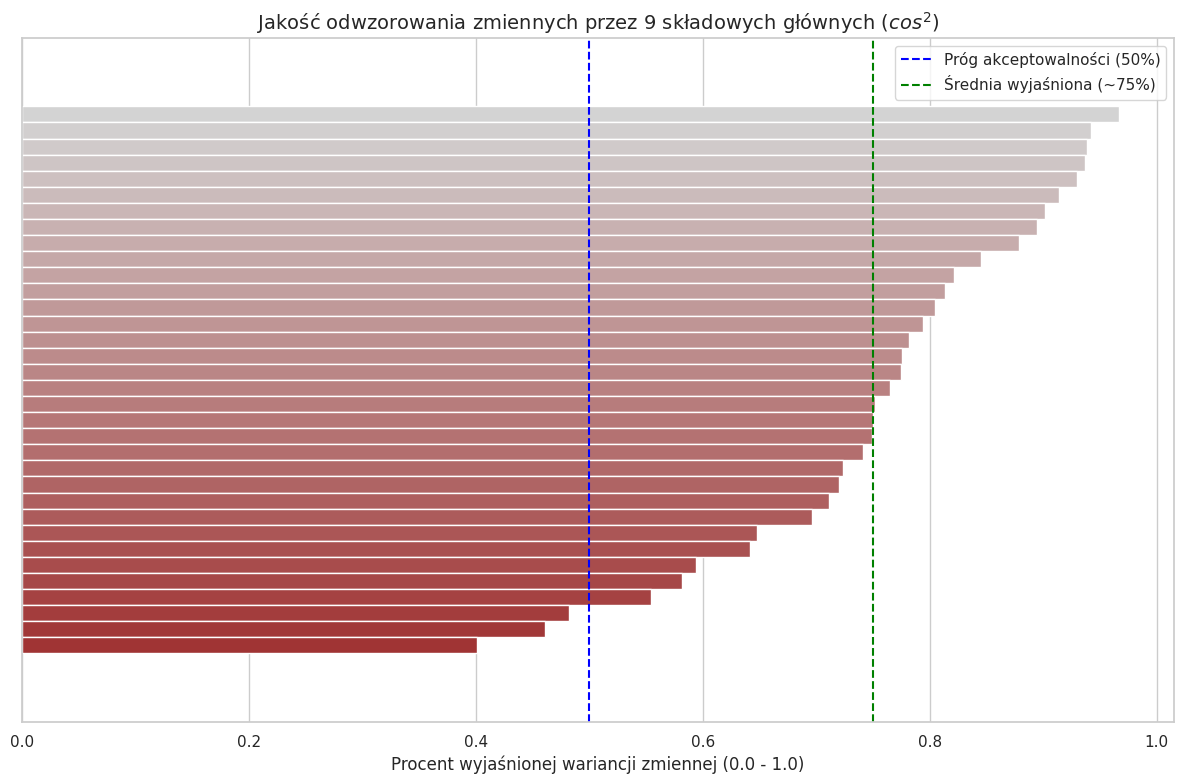

In [292]:
# wartości własne (siła/wariancja osi)
eigenvalues = best_pca.explained_variance_

# wektory (kierunki osi)
eigenvectors = best_pca.components_


# loadings/ładunki (korelacja) = Eigenvector * sqrt(Eigenvalue)
loadings = eigenvectors.T * np.sqrt(eigenvalues)

# wybieramy dla 9 składowych
loadings_n = loadings[:, :n]
qualities = np.sum(loadings_n**2, axis=1)

# tabela z wynikami
quality_df = pd.DataFrame(
    qualities,
    index=df_food_clean.columns,
    columns=['Jakość Odwzorowania wariancji']
).sort_values(by='Jakość Odwzorowania wariancji', ascending=False)

print(f"Średnia jakość odwzorowania zmienności: {quality_df['Jakość Odwzorowania wariancji'].mean():.4f}")
print(f"Ilość wyjaśnionej wariancji przez wszystkie {n_components} komponentów (składowych głownych): {cumulative_variance[n_components - 1]:.4f}")

print("=== TOP 10 ZMIENNYCH NAJLEPIEJ ODWZOROWANYCH ===")
print(quality_df.head(10))

print("\n=== ZMIENNE SŁABO ODWZOROWANE (< 0.5) ===")
print(quality_df[quality_df['Jakość Odwzorowania wariancji'] < 0.5])

# wizualizacja
plt.figure(figsize=(12, 8))
sns.barplot(
    x=quality_df['Jakość Odwzorowania wariancji'],
    hue=quality_df.index,
    legend=False,
    palette="blend:lightgray,#b22222" # Kolor przechodzi w czerwony dla silnych zmiennych
)

# Linie pomocnicze
plt.axvline(x=0.5, color='blue', linestyle='--', linewidth=1.5, label='Próg akceptowalności (50%)')
plt.axvline(x=0.75, color='green', linestyle='--', linewidth=1.5, label='Średnia wyjaśniona (~75%)')

plt.title(f'Jakość odwzorowania zmiennych przez {n} składowych głównych ($cos^2$)', fontsize=14)
plt.xlabel('Procent wyjaśnionej wariancji zmiennej (0.0 - 1.0)')
plt.legend()
plt.tight_layout()
plt.show()

### Wnioski


>Analiza PCA na zbiorze *Food Nutrition* zakończyła się sukcesem. Zastosowanie Kryterium Kaisera oraz wykres osypiska pozwoliły na skonstruowanie stabilnego, 9-wymiarowego modelu, który wyjaśnia ponad 3/4 zmienności zbioru. Wykryte struktury idealnie odwzorowują wiedzę z zakresu dietetyki, a wysoki procent odwzorowania kluczowych zmiennych potwierdza, że PCA jest bardzo dobrym narzędziem eksploracji dla danych biochemicznych.

## 3. Klasteryzacja / Klasyfikacja

## Klasteryzacja
> Do zadania klasteryzacji wybrano zbiór danych `Mall_Customers.csv` oraz metodę K-Means. Analiza ma na celu zidentyfikowanie ukrytych wzorców w danych i podzielenie klientów na grupy o podobnych profilach finansowych oraz nawykach zakupowych.

### Charakterystyka zbioru danych: Mall Customers

Zbiór danych zawiera informacje o klientach centrum handlowego. Pozwala na identyfikację grup klientów o podobnych cechach i zachowaniach zakupowych.

**Struktura zbioru:**
* **Liczba rekordów:** 200
* **Liczba zmiennych:** 5

**Opis zmiennych:**
1. **CustomerID:** Unikalny identyfikator klienta (zmienna techniczna).
2. **Genre:** Płeć klienta (Male/Female).
3. **Age:** Wiek klienta.
4. **Annual Income (k$):** Roczny dochód klienta wyrażony w tysiącach dolarów.
5. **Spending Score (1-100):** Wskaźnik wydatków przypisany przez centrum handlowe na podstawie zachowań klienta i historii zakupów (skala 1-100).

### Charakterystyka metody
> ### Algorytm K-Means (K-Średnich)

**Zasada działania:**
Algorytm K-Means to metoda **klasteryzacji**, która automatycznie grupuje dane w zbiory zwane klastrami. Proces ten wymaga, aby użytkownik z góry zdefiniował parametr $k$, który decyduje, na ile grup algorytm podzieli zbiór.

Mechanizm działania jest intuicyjny: dane trafiają do tego klastra, do którego środka (średniej) mają najbliżej. W efekcie wewnątrz jednego klastra znajdują się obserwacje najbardziej do siebie podobne, a różnice między poszczególnymi grupami są wyraźne.

**Metryka:**
Jako miarę podobieństwa wykorzystano **odległość euklidesową**. Algorytm dąży do minimalizacji odległości punktów od środków ich klastrów.

**Schemat algorytmu:**
1.  **Inicjalizacja:** Losowy wybór $k$ punktów startowych (centroidów).
2.  **Przypisanie:** Każdy punkt danych jest przypisywany do grupy, której centroid znajduje się najbliżej.
3.  **Aktualizacja:** Obliczane są nowe środki grup poprzez wyciągnięcie średniej ze wszystkich punktów w danym klastrze.
4.  **Konwergencja:** Proces powtarza się iteracyjnie do momentu ustabilizowania się algorytmu (gdy centroidy przestaną zmieniać położenie).

### Czyszczenie danych
>

In [293]:
df = pd.read_csv('Mall_Customers.csv')

df.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

df_clean_km = df.drop(columns=['CustomerID'])

In [294]:
df_clean_km.isna().sum()

,0
Gender,0
Age,0
Income,0
Spending_Score,0


In [295]:
df_clean_km.head()

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Implementacja
>

In [296]:
features = ['Age', 'Income', 'Spending_Score']

In [297]:
X = df_clean_km[features].copy()

In [298]:
# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [299]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

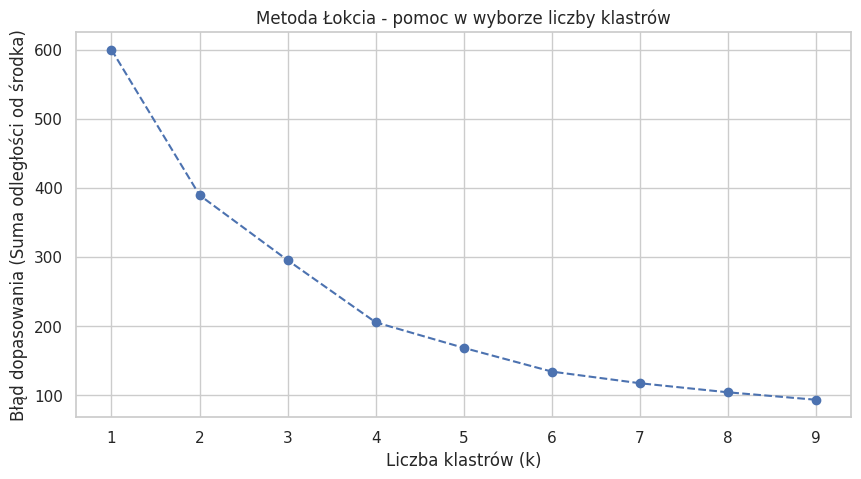

In [300]:
# Metoda Łokcia (Wybór k)
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Metoda Łokcia - pomoc w wyborze liczby klastrów')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Błąd dopasowania (Suma odległości od środka)')
plt.grid(True)
plt.show()

In [301]:
df_kmeans = df_clean_km.copy()

In [302]:
df_kmeans

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [303]:
model_kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
model_kmeans.fit(X_scaled)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [304]:
df_kmeans['cluster'] = model_kmeans.labels_

In [305]:
df_kmeans

,Gender,Age,Income,Spending_Score,cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,2
197,Male,32,126,74,3
198,Male,32,137,18,2


### Wyniki i wizualizacja
>

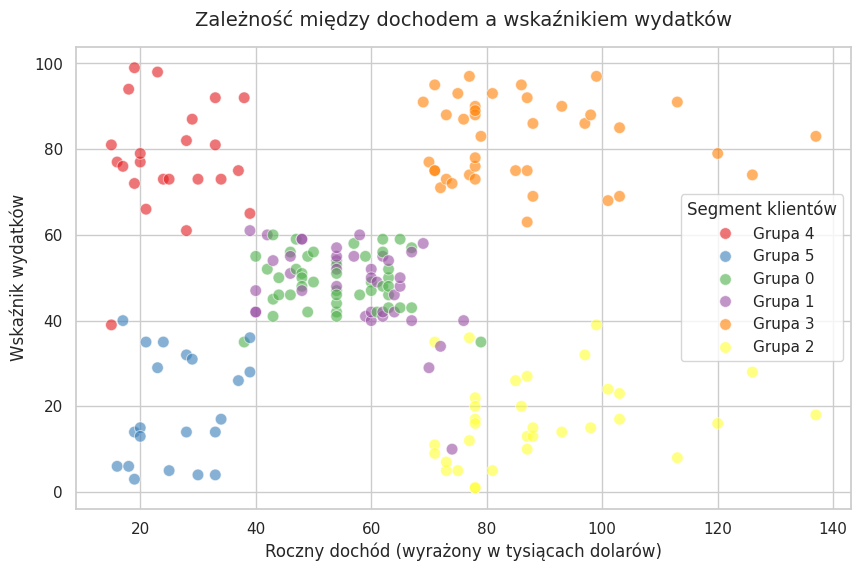

In [306]:
df_kmeans['segment'] = df_kmeans['cluster'].map({
    0: 'Grupa 0',
    1: 'Grupa 1',
    2: 'Grupa 2',
    3: 'Grupa 3',
    4: 'Grupa 4',
    5: 'Grupa 5'
})

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

scatter = sns.scatterplot(
    data=df_kmeans,
    x='Income',
    y='Spending_Score',
    hue='segment',
    palette='Set1',
    s=70,
    alpha=0.6,
    edgecolor='w'
)

plt.title('Zależność między dochodem a wskaźnikiem wydatków', fontsize=14, pad=15)
plt.xlabel('Roczny dochód (wyrażony w tysiącach dolarów)', fontsize=12)
plt.ylabel('Wskaźnik wydatków', fontsize=12)
plt.legend(title='Segment klientów')
plt.show()

### Interpretacja wizualizacji klastrów

Wykres przedstawia podział bazy klientów na grupy w oparciu o dwie kluczowe zmienne finansowe: **Roczny dochód** oraz **Wskaźnik wydatków**.

**Kluczowe obserwacje:**
* Możemy zauważyć m.in. grupę o wysokich dochodach, która wydaje mało (**Grupa 2**), grupę o wysokich dochodach i wysokich wydatkach (**Grupa 3**) oraz grupę o niskich dochodach, ale bardzo wysokich wydatkach (**Grupa 4**).
* Pozostałe skupiska reprezentują klientów o dochodach i wydatkach na poziomie średnim (**Grupa 0** i **Grupa 1**) oraz osoby o niskich zasobach portfela przy jednoczesnej dużej wstrzemięźliwości zakupowej (**Grupa 5**).
* Dobra separacja kolorów na wykresie potwierdza, że algorytm K-Means poprawnie zidentyfikował różnice w nawykach finansowych klientów.

Wizualizacja ta stanowi podstawę do opracowania spersonalizowanych strategii marketingowych dla każdego z segmentów.

### Oceniamy klasteryzację metryką Silhouette Score

In [307]:
s_score = silhouette_score(X_scaled, model_kmeans.labels_)
print(s_score)

0.4284167762892593


### Wnioski z analizy
>

In [308]:
features_to_analyze = ['Age', 'Income', 'Spending_Score']
summary = df_kmeans.groupby('cluster')[features_to_analyze].mean().round(2)

print("ŚREDNIE WARTOŚCI")
display(summary)

ŚREDNIE WARTOŚCI


,Age,Income,Spending_Score
cluster,,,
0,56.33,54.27,49.07
1,26.79,57.10,48.13
2,41.94,88.94,16.97
3,32.69,86.54,82.13
4,25.00,25.26,77.61
5,45.52,26.29,19.38


In [309]:
summary['Count'] = df_kmeans['cluster'].value_counts()
gender_dist = pd.crosstab(df_kmeans['cluster'], df_kmeans['Gender'], normalize='index').round(2)

print("STRUKTURA PŁCI W KLASTRACH")
display(gender_dist)

STRUKTURA PŁCI W KLASTRACH


Gender,Female,Male
cluster,,
0,0.58,0.42
1,0.64,0.36
2,0.42,0.58
3,0.54,0.46
4,0.57,0.43
5,0.62,0.38


In [310]:
print("\nLICZEBNOŚĆ GRUP")
print(df_kmeans['cluster'].value_counts())


LICZEBNOŚĆ GRUP
cluster
0    45
1    39
3    39
2    33
4    23
5    21
Name: count, dtype: int64


### Wnioski z analizy segmentacji klientów

Na podstawie przeprowadzonej klasteryzacji algorytmem K-Means ($k=6$) oraz analizy profilu grup, sformułowano następujące wnioski:

**1. Charakterystyka wyodrębnionych segmentów:**
* **Grupa 3 (VIP):** Klienci w wieku ok. 33 lat z najwyższymi dochodami (~86k$) i bardzo wysokim wskaźnikiem wydatków. Jest to kluczowy segment dla kampanii produktów luksusowych.
* **Grupa 2 (Oszczędni):** Osoby o zbliżonych dochodach do Grupy 3, ale bardzo niskich wydatkach. Sugeruje to wysoką świadomość finansową lub potrzebę innej oferty produktowej.
* **Grupa 4 (Młodzi Impulsywni):** Najmłodsza grupa (~25 lat) o niskich dochodach, ale bardzo wysokiej skłonności do wydatków. Idealni odbiorcy promocji i szybkich trendów.
* **Grupa 0 i 1 (Stabilny Środek):** Segment o średnich dochodach i wydatkach. Grupa 0 to klienci dojrzali (56 lat), a Grupa 1 to osoby młodsze (27 lat).
* **Grupa 5 (Budżetowi):** Osoby starsze (~45 lat) o najniższych dochodach i minimalnych wydatkach.

**2. Wpływ płci na segmentację:**
Analiza rozkładu płci wykazała, że **płeć nie jest dominującym czynnikiem różnicującym**. Choć w niektórych grupach (np. Grupa 1) zauważalna jest lekka przewaga kobiet, to w kluczowych finansowo segmentach (Grupa 2, Grupa 3) różnice są nieznaczne. Decyzje zakupowe w tym zbiorze danych wynikają głównie z dochodów i wieku.

**Podsumowanie końcowe:**
Model zidentyfikował 6 wyraźnych typów klientów. Największy potencjał wzrostu tkwi w **Grupie 2** (próba aktywacji ich wydatków) oraz w utrzymaniu lojalności **Grupy 3**.

## Klasyfikacja

Do zadania klasyfikacji wybrano zbiór danych `students_habits.csv` oraz algorytm **drzew decyzyjnych** (Decision Trees). Analiza ma na celu zidentyfikowanie kluczowych czynników wpływających na wyniki edukacyjne oraz stworzenie modelu, który na podstawie codziennych nawyków (takich jak czas nauki, sen czy aktywność fizyczna) będzie w stanie przewidzieć poziom sukcesu akademickiego studenta.

### Charakterystyka metody
> ### Algorytm Drzew Decyzyjnych (Decision Trees)

**Zasada działania:**
Drzewa decyzyjne to metoda **klasyfikacji**, która tworzy model w postaci struktury graficznej przypominającej drzewo. Proces ten polega na hierarchicznym dzieleniu zbioru danych na mniejsze podgrupy (gałęzie) na podstawie prostych reguł logicznych typu "`if-else`".

Mechanizm działania opiera się na zadawaniu serii pytań o cechy danych (np. "Czy czas nauki przekracza $4$ godziny?"). Na każdym etapie algorytm wykonuje podział, który najlepiej segreguje obserwacje pod względem przynależności do konkretnej klasy.

**Metryka: Indeks Giniego (Gini Impurity)**
W naszej analizie wykorzystujemy **Indeks Giniego**, który jest domyślną i najczęściej wybieraną metryką w bibliotece Scikit-Learn.

**Schemat algorytmu:**
1. **Wybór najlepszego IF:** Algorytm testuje wszystkie możliwe pytania (np. "Czy sen > 6h?") i wybiera to, które najbardziej obniża współczynnik Gini.
2. **Podział:** Rozdziela dane na dwie gałęzie.
3. **Powtarzanie:** Proces trwa, dopóki grupy nie staną się "czyste" lub drzewo nie osiągnie ustalonej głębokości.
4. **Decyzja:** Końcowe liście drzewa przypisują studentowi konkretną klasę wyniku.

### Implementacja
>

In [311]:
df_clean.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [312]:
# Przyjmijmy, że wynik powyżej 70 to sukces (1), a reszta to 0
df_clean['target'] = (df_clean['exam_score'] > 70).astype(int)

In [313]:
X = df_clean[['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'attendance_percentage']]
y = df_clean['target']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [315]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [316]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Wyniki i wizualizacja
>

In [317]:
y_pred = model.predict(X_test)
print(f"Dokładność modelu: {accuracy_score(y_test, y_pred):.2f}")

Dokładność modelu: 0.77


In [318]:
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        80
           1       0.80      0.78      0.79        95

    accuracy                           0.77       175
   macro avg       0.77      0.77      0.77       175
weighted avg       0.77      0.77      0.77       175



### Interpretacja wyników klasyfikacji

Model osiągnął ogólną dokładność (**Accuracy**) na poziomie **77%**, co oznacza, że w ponad 3/4 przypadków poprawnie przewiduje poziom wyników studenta.

**Kluczowe wskaźniki:**
* **Precyzja (Precision):** Dla klasy 1 (wysoki wynik) wynosi **0.80**, co oznacza, że gdy model przewiduje sukces studenta, trafia w 80% przypadków.
* **Czułość (Recall):** Wynosi odpowiednio **0.76** i **0.78**. Model radzi sobie niemal tak samo dobrze z wykrywaniem obu grup, nie faworyzując żadnej z nich.
* **Zbalansowanie (F1-score):** Wyniki na poziomie **0.75 - 0.79** świadczą o stabilności modelu i braku tzw. "overfittingu" (przetrenowania).

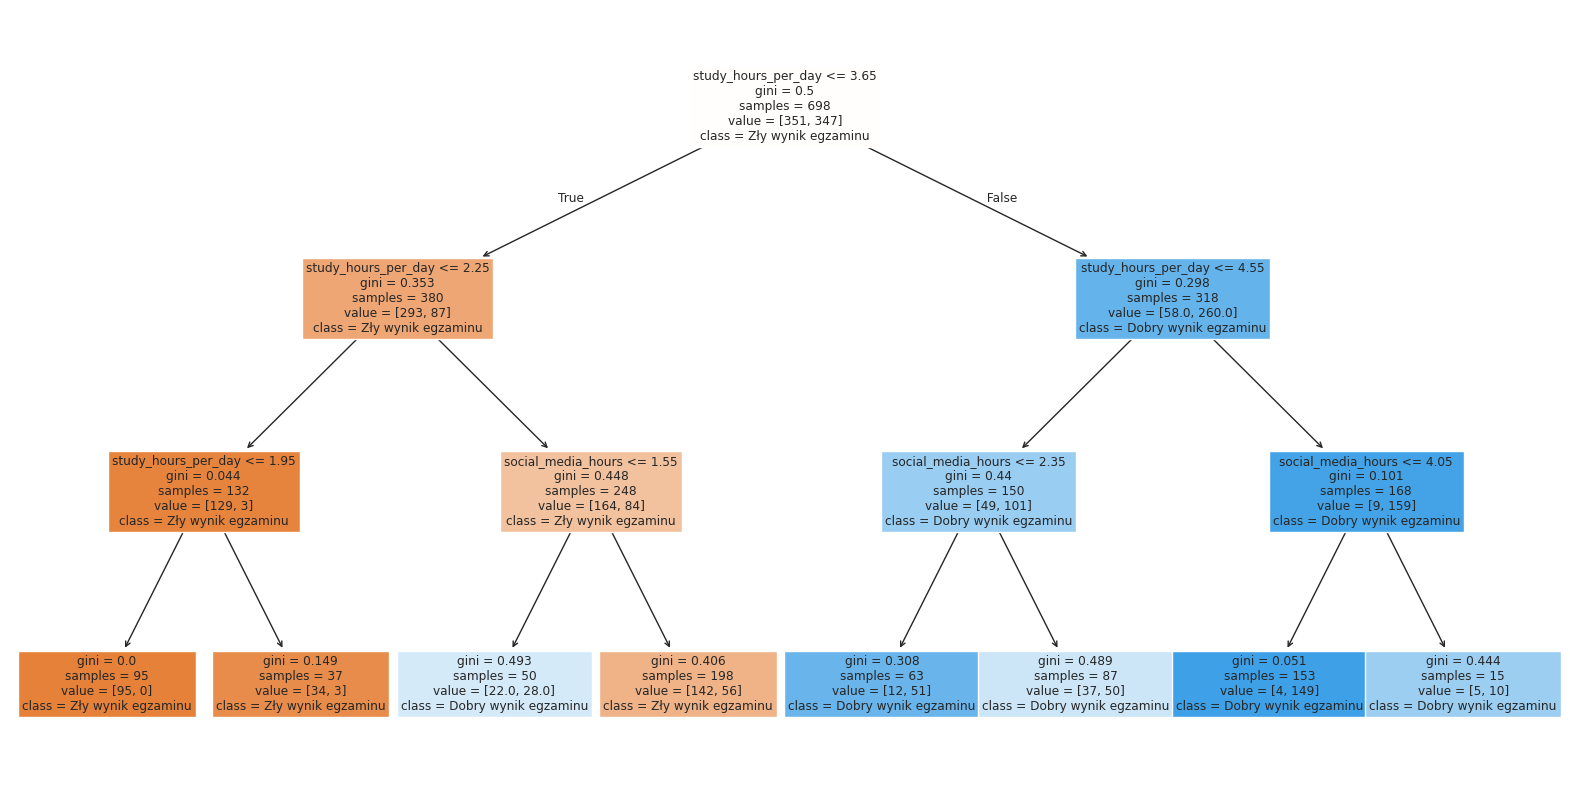

In [319]:
plt.figure(figsize = (20,10))
plot_tree(model, feature_names=X.columns, class_names=['Zły wynik egzaminu', 'Dobry wynik egzaminu'], filled=True)
plt.show()

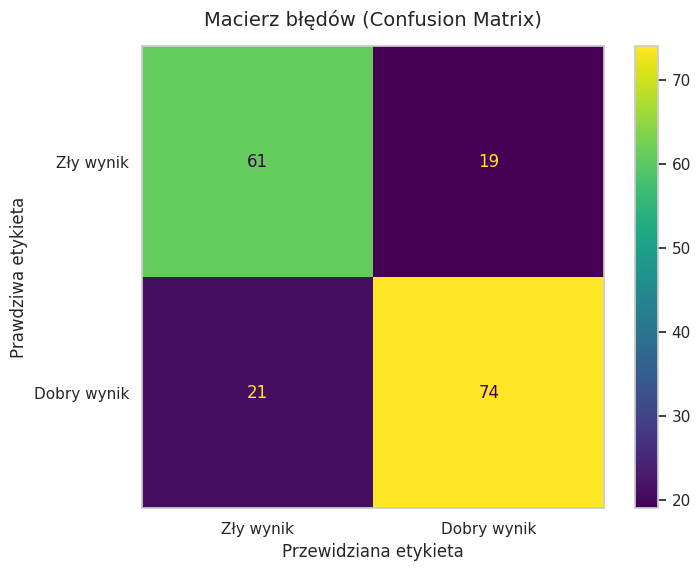

In [320]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Zły wynik', 'Dobry wynik']
)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

plt.title('Macierz błędów (Confusion Matrix)', fontsize=14, pad=15)
plt.xlabel('Przewidziana etykieta', fontsize=12)
plt.ylabel('Prawdziwa etykieta', fontsize=12)
plt.grid(False)
plt.show()

### Wnioski z analizy
>
 1. **Skuteczność:** Model poprawnie przewiduje wynik egzaminu w **77% przypadków**, co czyni go wiarygodnym narzędziem do oceny szans studentów.
2. **Kluczowe czynniki**:
    * **Czas nauki** jest najważniejszym czynnikiem decydującym o sukcesie.
   * **Media społecznościowe** to drugi kluczowy predyktor.
3. **Praktyczne zastosowanie:** Dzięki strukturze **if-else**, model pozwala błyskawicznie wyłapać studentów z grupy ryzyka (np. mało nauki + dużo social mediów) i zaproponować im wsparcie przed egzaminem.
4. **Zaleta metody:** Wykorzystanie Indeksu Giniego pozwoliło stworzyć proste i czytelne drzewo, które w logiczny sposób tłumaczy, dlaczego dany uczeń może mieć problem z zaliczeniem.

## 4. Reguły asocjacyjne / Wzorce sekwencji

### Charakterystyka metody
>Do wykrycia ukrytych powiązań i wzorców zachowań w zbiorze danych wybraliśmy algorytm Apriori. Jest to klasyczna metoda eksploracji danych (data mining), służąca do wydobywania częstych zbiorów elementów i generowania na ich podstawie reguł asocjacyjnych. W przeciwieństwie do metod statystycznych badających liniowe zależności, Apriori koncentruje się na współwystępowaniu konkretnych zdarzeń lub cech w ramach tej samej obserwacji.

###Dlaczego wybraliśmy Apriori?
>Główne powody użycia Apriori w kontekście nawyków studenckich to zdolność algorytmu do wykrywania złożonych wzorców, takich jak jednoczesny wpływ braku snu i wysokiej frekwencji na oceny, co jest nieuchwytne dla zwykłej macierzy korelacji. Metoda ta oferuje wysoką interpretowalność reguł, które jasno określają, jak konkretny styl życia studenta przekłada się na prawdopodobieństwo sukcesu egzaminacyjnego. Dzięki dyskretyzacji danych, Apriori pozwala na tworzenie wielowymiarowych profili studentów zamiast operowania wyłącznie na suchych statystykach opisowych.

In [321]:
from mlxtend.frequent_patterns import apriori, association_rules

In [322]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Implementacja

In [323]:
# 1. Kategoryzacja
habits_raw = df_clean.copy()

habits_raw["study_bin"] = pd.qcut(habits_raw["study_hours_per_day"], 3, labels=["study_low","study_mid","study_high"])
habits_raw["sleep_bin"] = pd.qcut(habits_raw["sleep_hours"], 3, labels=["sleep_low","sleep_mid","sleep_high"])
habits_raw["socialmedia_bin"] = pd.qcut(habits_raw["social_media_hours"], 3, labels=["socialmedia_low","socialmedia_mid","socialmedia_high"])
habits_raw["score_bin"] = pd.qcut(habits_raw["exam_score"], 3, labels=["score_low","score_mid","score_high"])


Dzielimy zmienne liczbowe (czas nauki, sen, social media, wynik) na 3 grupy kwantylowe: niskie, średnie, wysokie. Reguły asocjacyjne wymagają danych kategorycznych lub boolowskich, więc ten krok zamienia dane numeryczne w dyskretne poziomy.

In [324]:
# 2. Tworzenie koszyka (One-Hot Encoding)
habits_basket = pd.get_dummies(
    habits_raw[["study_bin", "sleep_bin", "socialmedia_bin", "score_bin"]],
    prefix="",
    prefix_sep=""
).astype(int)

habits_basket.head()

,study_low,study_mid,study_high,sleep_low,sleep_mid,sleep_high,socialmedia_low,socialmedia_mid,socialmedia_high,score_low,score_mid,score_high
0,1,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0,1,1,0,0
4,0,0,1,1,0,0,0,0,1,0,1,0


Zmieniamy kategorie na zestaw kolumn binarnych (0/1) — jedna kolumna reprezentuje jedną cechę typu:
study_high, sleep_low, score_mid, itd.
To dokładnie taki format, jakiego wymaga algorytm Apriori.

In [325]:
# 3. Generowanie zbiorów częstych
habits_min_support = 0.1
habits_itemsets = apriori(
    habits_basket,
    min_support=habits_min_support,
    use_colnames=True
)

Algorytm Apriori znajduje zbiory cech, które pojawiają się w co najmniej 10% przypadków. Wynikiem są zestawy typu:

(study_low)

(sleep_mid, caff_low)

(study_high, score_high) itd.

In [326]:
# 4. Generowanie reguł
habits_min_conf = 0.3
habits_rules = association_rules(
    habits_itemsets,
    metric="confidence",
    min_threshold=habits_min_conf
)

Tworzymy reguły typu „jeśli X → to Y”, gdzie confidence jest większe niż 0.30. Reguły łączą zachowania studentów z ich wynikami.

### Wyniki i wizualizacja

In [327]:
# 5. Podgląd reguł
habits_rules_view = habits_rules[
    ["antecedents", "consequents", "support", "confidence", "lift"]
].sort_values("lift", ascending=False)

display(habits_rules_view)

,antecedents,consequents,support,confidence,lift
86,(score_low),"(socialmedia_high, study_low)",0.100802,0.300341,2.570568
82,"(socialmedia_high, study_low)",(score_low),0.100802,0.862745,2.570568
36,(study_high),(score_high),0.237113,0.750000,2.257759
37,(score_high),(study_high),0.237113,0.713793,2.257759
10,(study_low),(score_low),0.253150,0.746622,2.224576
...,...,...,...,...,...
0,(study_low),(sleep_low),0.109966,0.324324,0.934439
47,(score_mid),(sleep_low),0.107675,0.324138,0.933902
46,(sleep_low),(score_mid),0.107675,0.310231,0.933902
22,(socialmedia_high),(study_mid),0.105384,0.321678,0.932974


Tworzymy czytelną tabelę reguł. Sortujemy po lift, który mówi, jak bardzo zależność jest silniejsza niż przypadek. Reguły typu:

study_high → score_high

sleep_low → score_low

caff_high + study_low → score_low

często będą miały wysoki lift.

### Wnioski z analizy


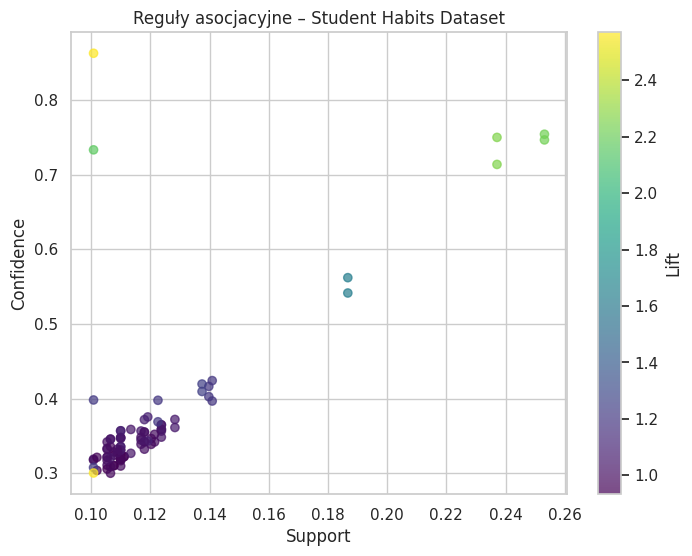

In [328]:
# 6. Wizualizacja

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    habits_rules["support"],
    habits_rules["confidence"],
    c=habits_rules["lift"],
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(scatter, label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Reguły asocjacyjne – Student Habits Dataset")
plt.show()

Punkty położone wysoko, po prawej i w jasnych kolorach są najlepszymi regułami.

>Wizualizacja potwierdza występowanie silnych zależności w badanym zbiorze. Wygenerowane reguły wskazują na wyraźny związek między nawykami a wynikami egzaminów, co potwierdzają wartości wskaźnika lift przekraczające 1. Dowodzi to, że odkryte wzorce są istotne statystycznie i nie wynikają z przypadku, a wysoka ufność wybranych reguł pozwala uznać czas nauki za kluczowy predyktor sukcesu akademickiego.

## 5. Podsumowanie końcowe

Cały projekt stanowi kompleksową ścieżkę eksploracji danych (Data Mining) – od redukcji wymiarowości, przez segmentację, aż po modelowanie predykcyjne i odkrywanie ukrytych wzorców asocjacyjnych.

### Ocena przydatności użytych metod:

1. **Analiza Głównych Składowych (PCA):**
   * **Zbiór Students:** Metoda wykazała niską przydatność do redukcji ze względu na niezależność zmiennych występujących w zbiorze.
   * **Zbiór Food Nutrition:** Tutaj PCA okazało się **wysoce skuteczne**. Zredukowano zbiór z ponad 30 zmiennych do 9 składowych, zachowując aż **75% informacji**. Potwierdziło to, że PCA jest idealne dla danych biochemicznych o silnych korelacjach liniowych.

2. **Klasteryzacja K-Means (Mall Customers):**
   * Metoda **bardzo przydatna** do profilowania klienta. Dzięki optymalizacji liczby klastrów ($k=6$) i metryce Silhouette, udało się matematycznie wydzielić grupy charakteryzujące się odpowiednimi nawykami zakupowymi. Analiza pokazała, że to dochód i wiek, a nie płeć, są kluczowe dla segmentacji.

3. **Drzewa Decyzyjne (Students Habits):**
   * Metoda o **najwyższej wartości aplikacyjnej**. Uzyskanie **77% dokładności** przy tak czytelnej strukturze (reguły if-else) pozwala na realne zastosowanie modelu w diagnozie studentów. Analiza jednoznacznie wskazała czas nauki oraz media społecznościowe jako najważniejsze czynniki wpływające na wynik egzaminu.

4. **Reguły Asocjacyjne (Apriori):**
   * Metoda ta stanowiła doskonałe domknięcie projektu. Pozwoliła na odkrycie **nieoczywistych powiązań**, których nie widać w regresji czy klasyfikacji. Dzięki wskaźnikowi **Lift > 1**, udało się potwierdzić statystyczną istotność współwystępowania konkretnych nawyków (np. niskiej ilości snu z niskimi wynikami).

### Wnioski końcowe:
>Dobór metod był **optymalny i komplementarny**. PCA pozwoliło zrozumieć strukturę korelacji w danych, K-Means podzieliło populację na logiczne grupy, Drzewa Decyzyjne dały narzędzie do przewidywania przyszłości, a reguły Apriori opisały ukryte mechanizmy zachowań. Projekt udowadnia, że skuteczna eksploracja danych wymaga dopasowania algorytmu do natury zbioru (co pokazało porównanie PCA na dwóch różnych bazach).